<a href="https://colab.research.google.com/github/frcdouglas/RFM-analysis-with-Pyhon-Desafio-DNC/blob/main/data_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Context**  
An e-commerce company has requested an analysis of the **Recency, Frequency, and Monetary (RFM)** indicators for its customers. The RFM model consists of:  

- **R (Recency):** The number of days since the customer's last purchase.  
- **F (Frequency):** The total number of purchases made by the customer.  
- **M (Monetary):** The average amount spent per order by the customer.  

Where **average ticket = the total amount spent per order for each customer**.  

---

### **Columns - Description**  

- **CustomerID** – Unique customer identification code.  
- **Description** – Product description.  
- **InvoiceNo** – Invoice number.  
- **StockCode** – Product stock code.  
- **Quantity** – Number of products purchased.  
- **InvoiceDate** – Invoice date (purchase date).  
- **UnitPrice** – Unit price of the product.  
- **Country** – Country where the purchase was made.  





In [ ]:
!pip install sidetable
!pip install pandas-profiling

In [ ]:
# new version of pandas-profiling
!pip install ydata-profiling
from ydata_profiling import ProfileReport

In [ ]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import sidetable
import ydata_profiling
import missingno as msno
from ipywidgets import interact, widgets

In [ ]:
# Read the data from the dataset provided by the e-commerce – it was necessary to change the encoding to 'latin1' due to special characters.
df = pd.read_csv('/content/drive/MyDrive/PORTFOLIO/Desafio 5 DNC: Prepare seu dataset para modelagem de dados/data  desafio 5 DNC.csv', encoding='latin1')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [ ]:
# Identify and display sum of null values in each collumn
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [ ]:
# To handle the null values, it was decided to remove the rows where they were identified.
df_semnulos = df.dropna()
df_semnulos

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [ ]:
# identifying how many rows have a price less than or equal to zero.
(df_semnulos['UnitPrice'] <= 0).sum()

40

In [ ]:
# df with prices greater than zero.
df_no_zero = df_semnulos[df_semnulos['UnitPrice'] > 0]
df_no_zero

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [ ]:
# identifying how many rows have a price less than or equal to zero.
(df_no_zero['Quantity'] <= 0).sum()

8905

In [ ]:
# df Quantity > 0
df_no_zero = df_semnulos[df_semnulos['Quantity'] > 0]
df_no_zero

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [ ]:
# Check for duplicate rows in the df_no_zero dataset
df_no_zero.duplicated().sum()

5192

In [ ]:
# Remove duplicate rows based on all columns (same purchase, same customer, same time, etc.)
df_no_zero.drop_duplicates(inplace=True)
df_no_zero

<ipython-input-58-cdc375cd4872>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_zero.drop_duplicates(inplace=True)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [ ]:
# Check the data type of the columns.
df_no_zero.dtypes

,0
InvoiceNo,object
StockCode,object
Description,object
Quantity,int64
InvoiceDate,object
UnitPrice,float64
CustomerID,float64
Country,object


In [ ]:
# Correcting the data type of the columns CustomerID to int and InvoiceDate to datetime.
df_no_zero = df_no_zero.copy() # ensure that df_no_zero is an independent DataFrame.
df_no_zero['CustomerID'] = df_no_zero['CustomerID'].astype(int)
df_no_zero['InvoiceDate'] = pd.to_datetime(df_no_zero['InvoiceDate'])
df_no_zero.dtypes

,0
InvoiceNo,object
StockCode,object
Description,object
Quantity,int64
InvoiceDate,datetime64[ns]
UnitPrice,float64
CustomerID,int64
Country,object


In [ ]:
# to evaluate the outliers, we will remove items where the quantity of the item in the purchase is greater than 10000 or the unit price is greater than 5000.
df_no_zero = df_no_zero[(df_no_zero['Quantity'] < 10000) & (df_no_zero['UnitPrice'] < 5000)]
df_no_zero

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France


In [ ]:
# create an additional column with the total price of the purchase. It will be the multiplication of UnitPrice with Quantity = Total Price.
df_no_zero.loc[:,'TotalPrice'] = df_no_zero['UnitPrice'] * df_no_zero['Quantity']
df_no_zero

<ipython-input-62-34fb433ba780>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_zero.loc[:,'TotalPrice'] = df_no_zero['UnitPrice'] * df_no_zero['Quantity']


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60


In [ ]:
# Using the max() function, calculate the date of the last purchase in the dataset for later calculation of recency
df_no_zero['InvoiceDate'].max()

Timestamp('2011-12-09 12:50:00')

<Axes: xlabel='Country'>

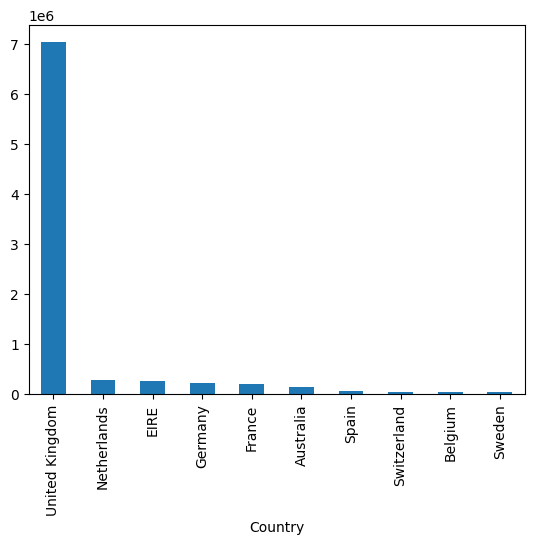

In [ ]:
# grapph with the top 10 countries with the highest total sales value.
df_no_zero.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False).head(10).plot(kind='bar')

<Axes: xlabel='Description'>

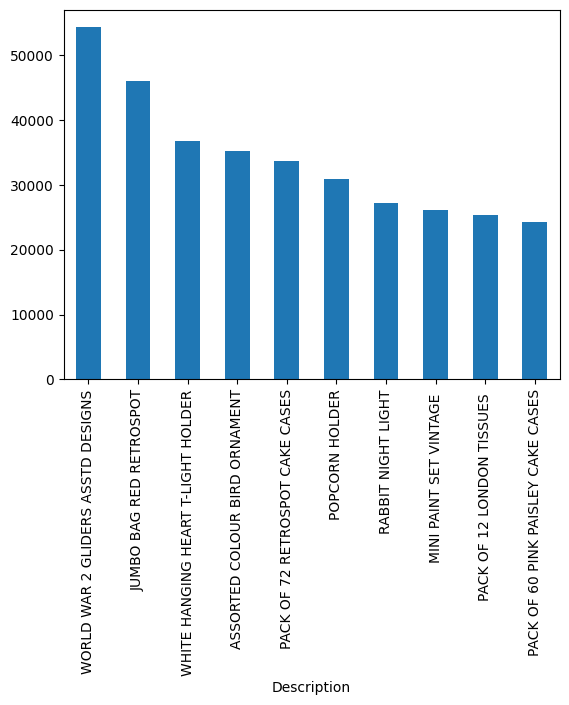

In [ ]:
# Graph with the top 10 best-selling products.
df_no_zero.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10).plot(kind='bar')

<Axes: xlabel='InvoiceDate'>

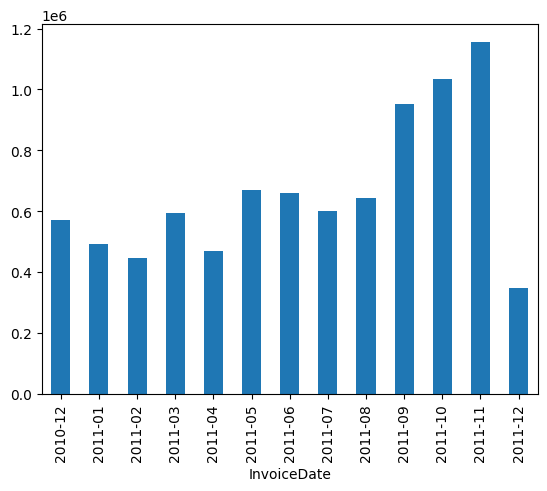

In [ ]:
# Graph with total sales value by month in each year.
df_no_zero.groupby(df_no_zero['InvoiceDate'].dt.strftime('%Y-%m'))['TotalPrice'].sum().plot(kind='bar')

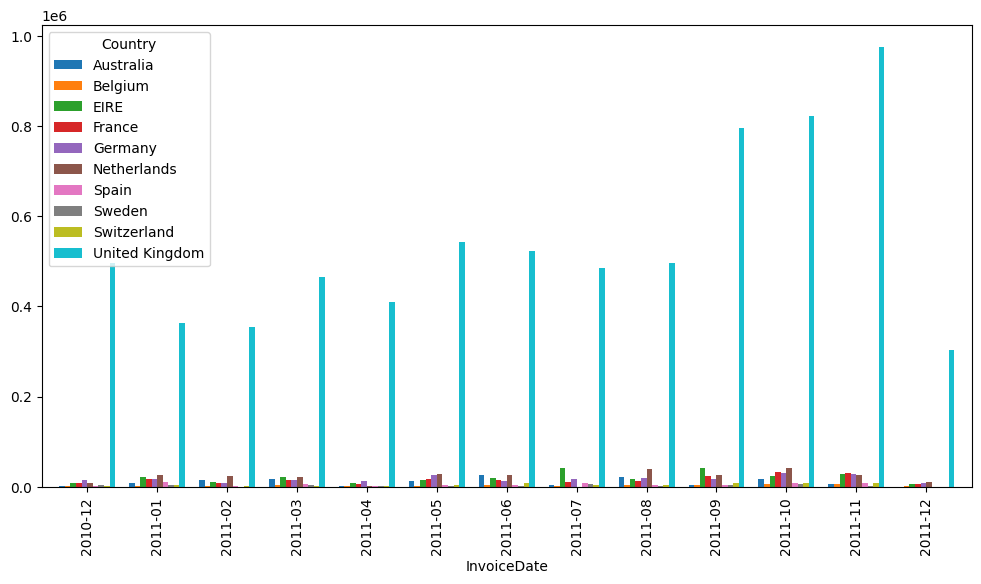

In [ ]:
# Graph with total sales value by month and by country (consider only the top 10)
top_10_paises = df_no_zero.groupby('Country')['TotalPrice'].sum().nlargest(10).index
# Filter only the top 10 countries
df_filtrado = df_no_zero[df_no_zero['Country'].isin(top_10_paises)]
# Group by month and country and calculate the total sales
df_agrupado = df_filtrado.groupby([df_filtrado['InvoiceDate'].dt.strftime('%Y-%m'), 'Country'])['TotalPrice'].sum().unstack()
# Create the graph
ax = df_agrupado.plot(kind='bar', figsize=(12, 6), width=0.8)

In [ ]:
df_no_zero

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60


In [ ]:
# For RFM calculation, we will first group the data by purchase and by customer
df_agrupado = df_no_zero.groupby(['InvoiceNo', 'CustomerID']).agg({'InvoiceDate': 'min', 'TotalPrice': 'sum'}).reset_index()
df_agrupado

,InvoiceNo,CustomerID,InvoiceDate,TotalPrice
0,536365,17850,2010-12-01 08:26:00,139.12
1,536366,17850,2010-12-01 08:28:00,22.20
2,536367,13047,2010-12-01 08:34:00,278.73
3,536368,13047,2010-12-01 08:34:00,70.05
4,536369,13047,2010-12-01 08:35:00,17.85
...,...,...,...,...
18527,581583,13777,2011-12-09 12:23:00,124.60
18528,581584,13777,2011-12-09 12:25:00,140.64
18529,581585,15804,2011-12-09 12:31:00,329.05
18530,581586,13113,2011-12-09 12:49:00,339.20


In [ ]:
# Calculating the purchase frequency per customer
df_agrupado['Frequency'] = df_agrupado.groupby('CustomerID')['InvoiceNo'].transform('nunique')
df_agrupado

,InvoiceNo,CustomerID,InvoiceDate,TotalPrice,Frequency
0,536365,17850,2010-12-01 08:26:00,139.12,34
1,536366,17850,2010-12-01 08:28:00,22.20,34
2,536367,13047,2010-12-01 08:34:00,278.73,10
3,536368,13047,2010-12-01 08:34:00,70.05,10
4,536369,13047,2010-12-01 08:35:00,17.85,10
...,...,...,...,...,...
18527,581583,13777,2011-12-09 12:23:00,124.60,33
18528,581584,13777,2011-12-09 12:25:00,140.64,33
18529,581585,15804,2011-12-09 12:31:00,329.05,13
18530,581586,13113,2011-12-09 12:49:00,339.20,24


In [ ]:
# Calculating the monetary per customer
df_agrupado['Monetary'] = df_agrupado['TotalPrice'].round(2)
df_agrupado

,InvoiceNo,CustomerID,InvoiceDate,TotalPrice,Frequency,Monetary
0,536365,17850,2010-12-01 08:26:00,139.12,34,139.12
1,536366,17850,2010-12-01 08:28:00,22.20,34,22.20
2,536367,13047,2010-12-01 08:34:00,278.73,10,278.73
3,536368,13047,2010-12-01 08:34:00,70.05,10,70.05
4,536369,13047,2010-12-01 08:35:00,17.85,10,17.85
...,...,...,...,...,...,...
18527,581583,13777,2011-12-09 12:23:00,124.60,33,124.60
18528,581584,13777,2011-12-09 12:25:00,140.64,33,140.64
18529,581585,15804,2011-12-09 12:31:00,329.05,13,329.05
18530,581586,13113,2011-12-09 12:49:00,339.20,24,339.20


In [ ]:
# Grouping again by customer, using the date as the date of the last purchase
df_agrupado = df_agrupado.groupby('CustomerID').agg({'InvoiceDate': 'max', 'Frequency': 'first', 'Monetary': 'first'}).reset_index()
df_agrupado

,CustomerID,InvoiceDate,Frequency,Monetary
0,12347,2011-12-07 15:52:00,7,711.79
1,12348,2011-09-25 13:13:00,4,892.80
2,12349,2011-11-21 09:51:00,1,1757.55
3,12350,2011-02-02 16:01:00,1,334.40
4,12352,2011-11-03 14:37:00,8,296.50
...,...,...,...,...
4332,18280,2011-03-07 09:52:00,1,180.60
4333,18281,2011-06-12 10:53:00,1,80.82
4334,18282,2011-12-02 11:43:00,2,100.21
4335,18283,2011-12-06 12:02:00,16,108.45


In [ ]:
# with the last date and the grouped data, we can calculate the recency
df_agrupado['Recency'] = (df_agrupado['InvoiceDate'].max() - df_agrupado['InvoiceDate']).dt.days
df_agrupado

,CustomerID,InvoiceDate,Frequency,Monetary,Recency
0,12347,2011-12-07 15:52:00,7,711.79,1
1,12348,2011-09-25 13:13:00,4,892.80,74
2,12349,2011-11-21 09:51:00,1,1757.55,18
3,12350,2011-02-02 16:01:00,1,334.40,309
4,12352,2011-11-03 14:37:00,8,296.50,35
...,...,...,...,...,...
4332,18280,2011-03-07 09:52:00,1,180.60,277
4333,18281,2011-06-12 10:53:00,1,80.82,180
4334,18282,2011-12-02 11:43:00,2,100.21,7
4335,18283,2011-12-06 12:02:00,16,108.45,3


---

# With this data, we can perform a more efficient customer segmentation improving **retention** (by identifying customers who are about to leave),  optimizing **marketing** (by directing investments toward customers with higher return potential), and increasing the **average ticket per purchase** (by implementing strategies such as **cross-sell** and **upsell**).  

---

In [ ]:
# Classificando Recency em grupos
bins = [0, 20, 40, 60, 100, float('inf')]
labels = [5, 4, 3, 2, 1]
# Grupo 5 -> Recency < 20
# Grupo 4 -> 20 <= Recency < 40
# Grupo 3 -> 40 <= Recency < 60
# Grupo 2 -> 60 <= Recency < 100
# Grupo 1 -> Recency > 100

# Aplicando a classificação
df_agrupado['Recency_Group'] = pd.cut(df_agrupado['Recency'], bins=bins, labels=labels, right=False)
df_agrupado

,CustomerID,InvoiceDate,Frequency,Monetary,Recency,Recency_Group
0,12347,2011-12-07 15:52:00,7,711.79,1,5
1,12348,2011-09-25 13:13:00,4,892.80,74,2
2,12349,2011-11-21 09:51:00,1,1757.55,18,5
3,12350,2011-02-02 16:01:00,1,334.40,309,1
4,12352,2011-11-03 14:37:00,8,296.50,35,4
...,...,...,...,...,...,...
4332,18280,2011-03-07 09:52:00,1,180.60,277,1
4333,18281,2011-06-12 10:53:00,1,80.82,180,1
4334,18282,2011-12-02 11:43:00,2,100.21,7,5
4335,18283,2011-12-06 12:02:00,16,108.45,3,5


In [ ]:
df_agrupado['Frequency'].mean()

4.27299976942587

In [ ]:
# Definindo os intervalos e os labels
bins_frequency = [1, 2, 3, 6, 10, float('inf')]
labels_frequency = [1, 2, 3, 4, 5]

# Grupo 5 → Frequency ≥ 10 (inclusivo à esquerda)
# Grupo 4 → 6 ≤ Frequency < 10
# Grupo 3 → 3 ≤ Frequency < 6
# Grupo 2 → 2 ≤ Frequency < 3
# Grupo 1 → Frequency = 1

# Aplicando a classificação para a coluna 'frequency'
df_agrupado['Frequency_Group'] = pd.cut(df_agrupado['Frequency'], bins=bins_frequency, labels=labels_frequency, right=False)
df_agrupado

,CustomerID,InvoiceDate,Frequency,Monetary,Recency,Recency_Group,Frequency_Group
0,12347,2011-12-07 15:52:00,7,711.79,1,5,4
1,12348,2011-09-25 13:13:00,4,892.80,74,2,3
2,12349,2011-11-21 09:51:00,1,1757.55,18,5,1
3,12350,2011-02-02 16:01:00,1,334.40,309,1,1
4,12352,2011-11-03 14:37:00,8,296.50,35,4,4
...,...,...,...,...,...,...,...
4332,18280,2011-03-07 09:52:00,1,180.60,277,1,1
4333,18281,2011-06-12 10:53:00,1,80.82,180,1,1
4334,18282,2011-12-02 11:43:00,2,100.21,7,5,2
4335,18283,2011-12-06 12:02:00,16,108.45,3,5,5


In [ ]:
from google.colab import files

df_agrupado.to_csv('/content/df_agrupado.csv', index=False)
files.download('/content/df_agrupado.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>